In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

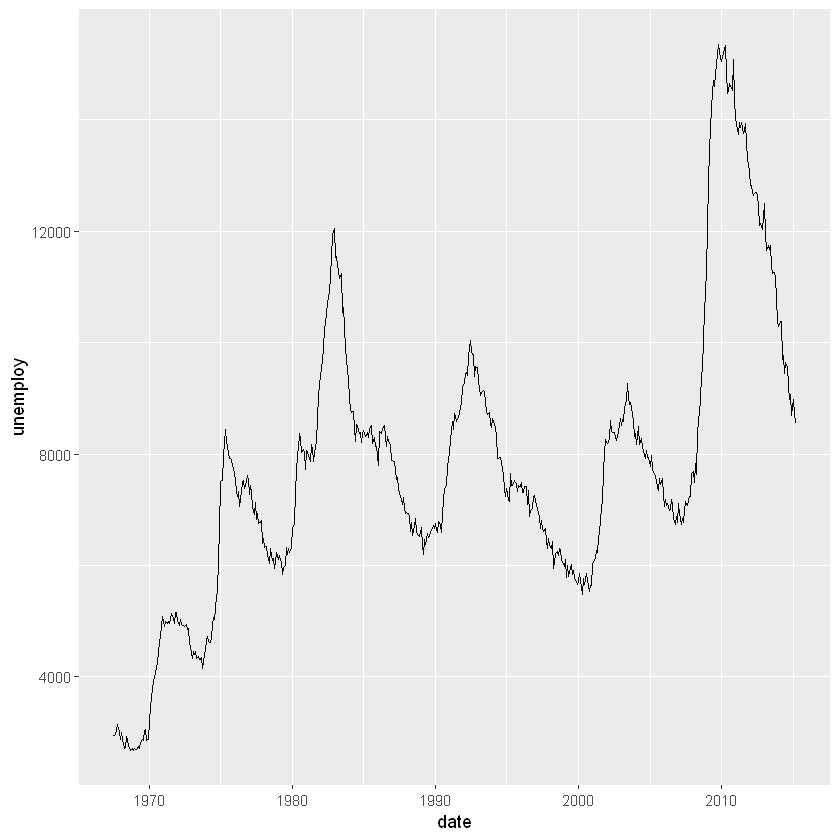

In [2]:
# geom_line() is suitable for time series

ggplot(economics, aes(date, unemploy)) + geom_line()

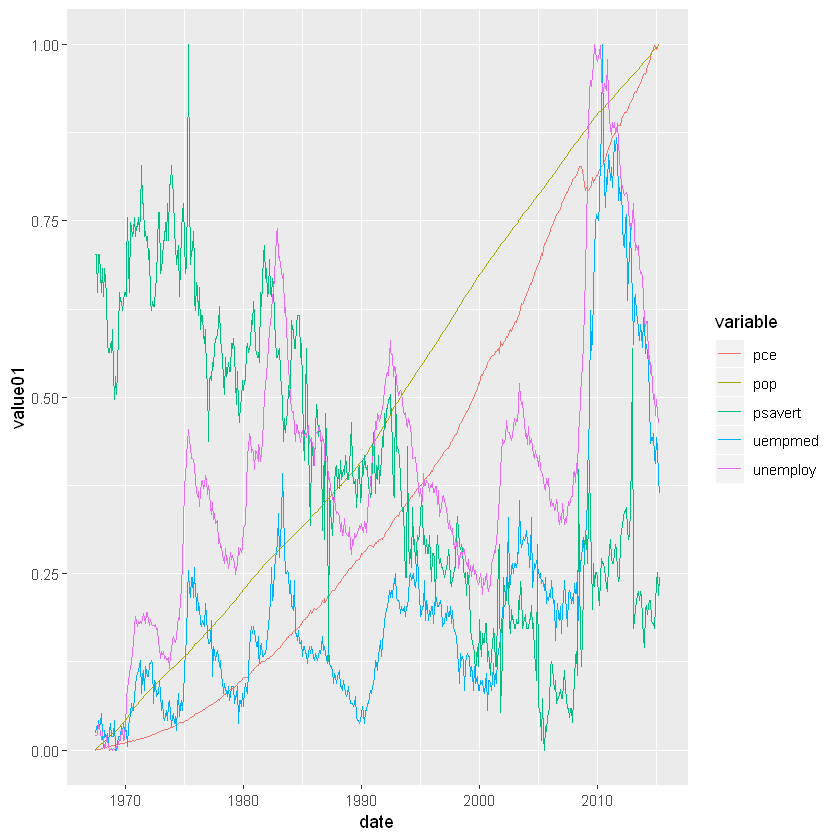

In [3]:
ggplot(economics_long, aes(date, value01, colour = variable)) +
  geom_line()

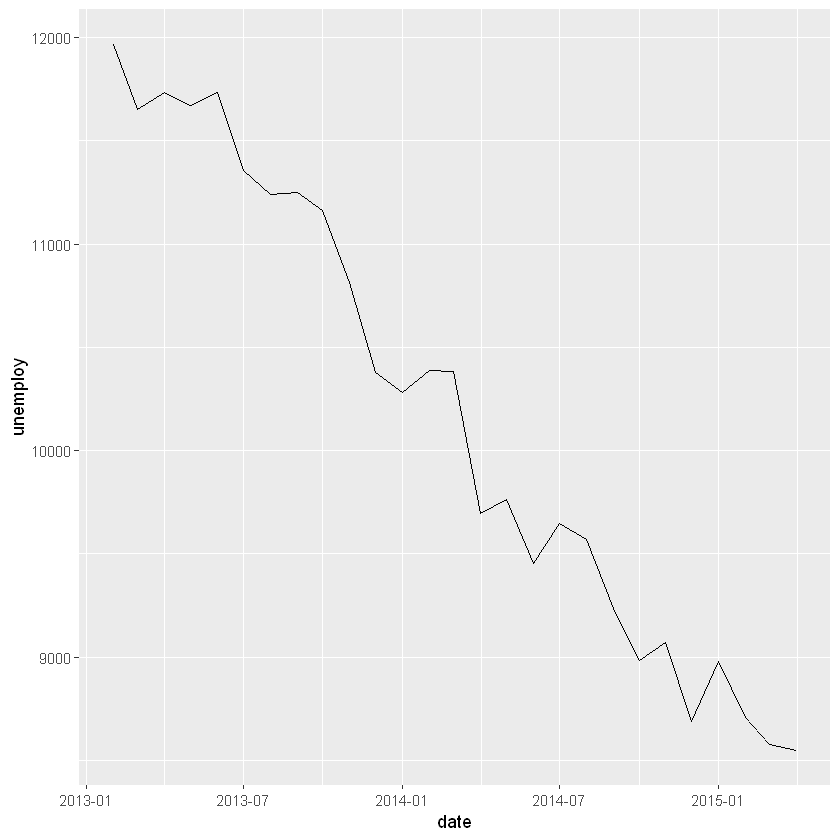

In [4]:
# geom_step() is useful when you want to highlight exactly
# when the y value changes

recent <- economics[economics$date > as.Date("2013-01-01"), ]

ggplot(recent, aes(date, unemploy)) + geom_line()

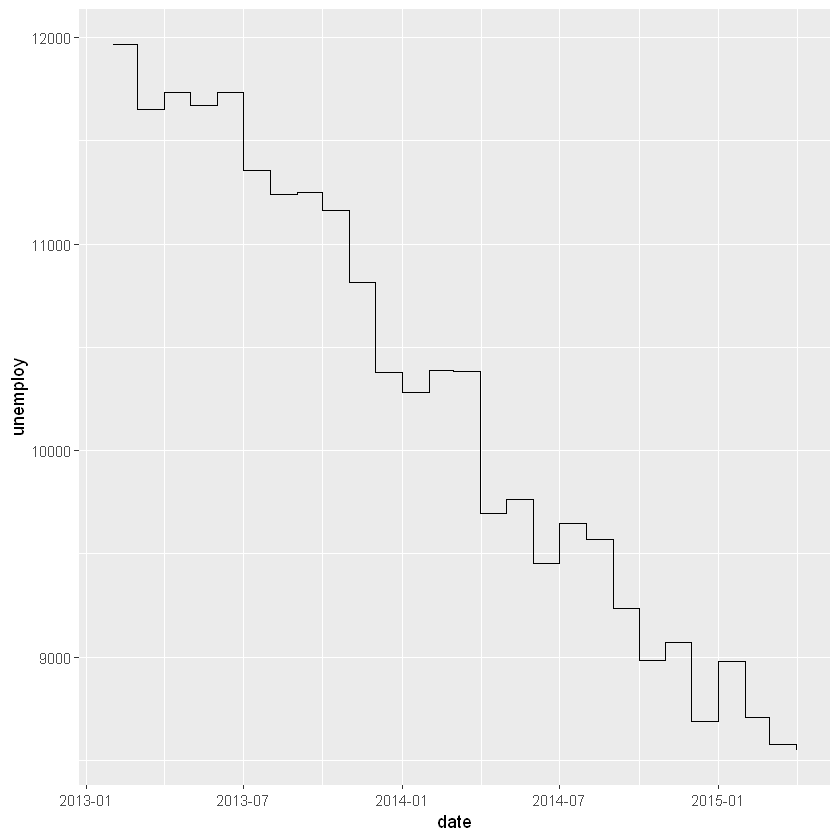

In [5]:
ggplot(recent, aes(date, unemploy)) + geom_step()

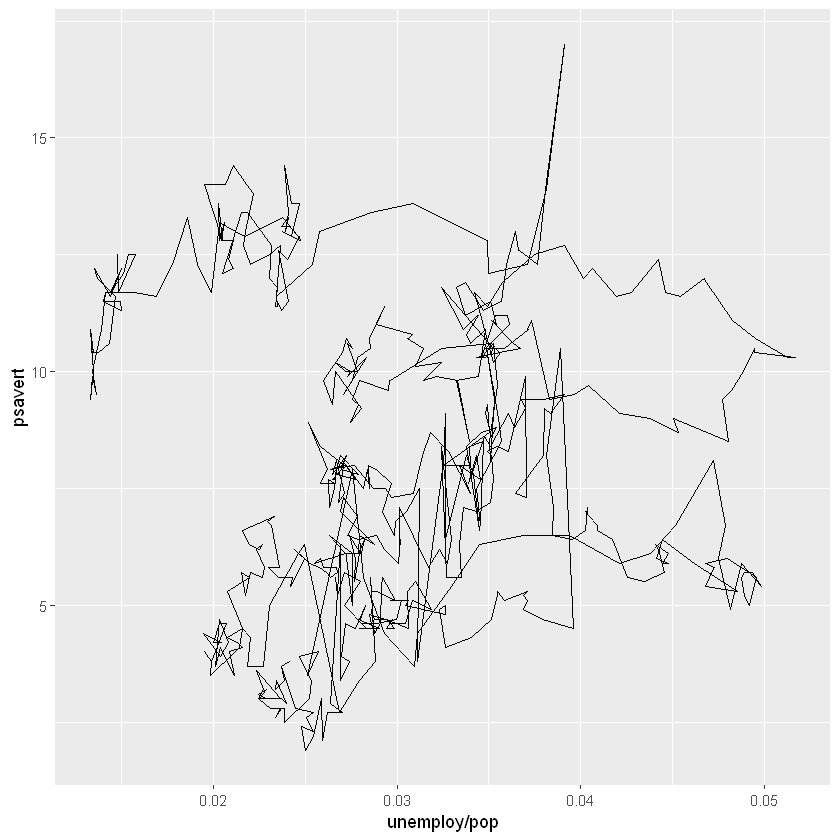

In [6]:
# geom_path() lets us explore how 2 variables are related over
# time, e.g. unemployment and personal savings rate

m <- ggplot(economics, aes(unemploy / pop, psavert))
m + geom_path()

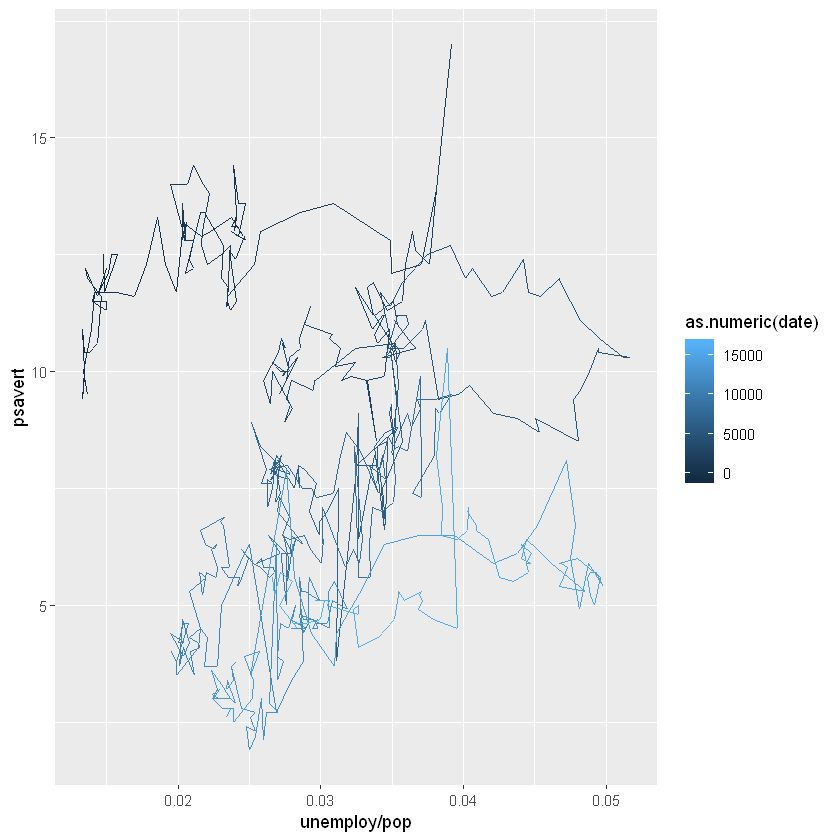

In [7]:
m + geom_path(aes(colour = as.numeric(date)))

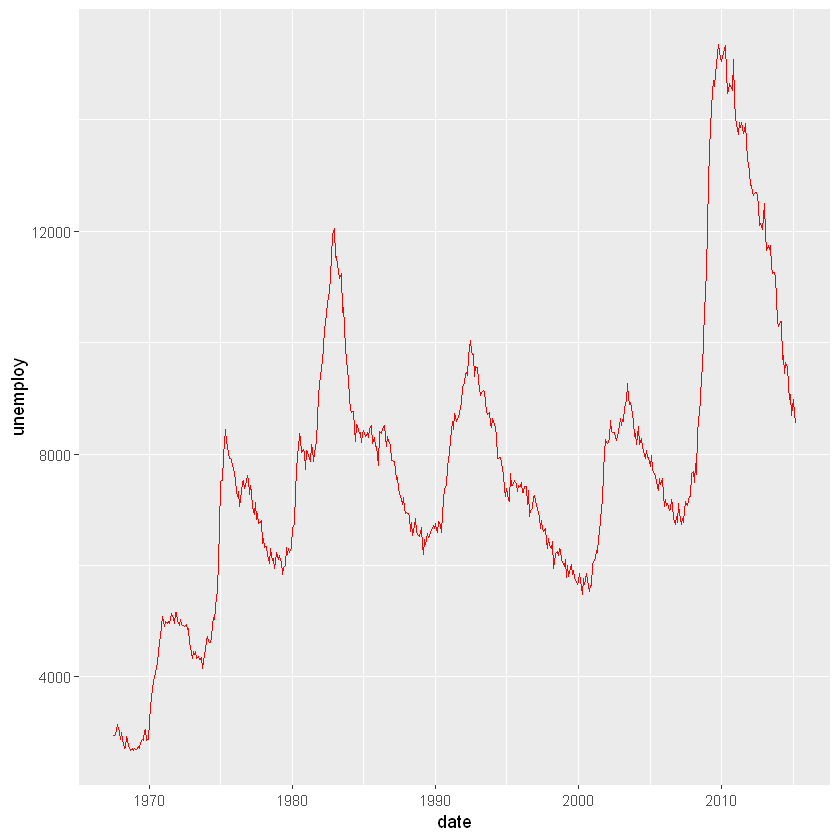

In [8]:
# Changing parameters ---------------------------------------

ggplot(economics, aes(date, unemploy)) +
  geom_line(colour = "red")

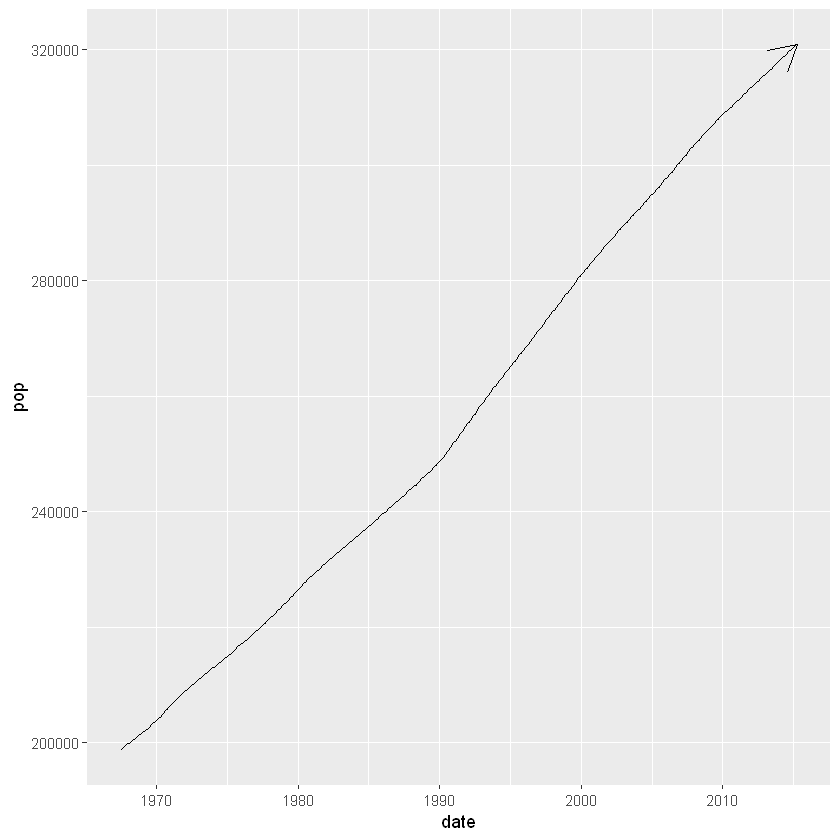

In [9]:
# Use the arrow parameter to add an arrow to the line
# Refer ?arrow for more details

c <- ggplot(economics, aes(x = date, y = pop)) 
c + geom_line(arrow = arrow())

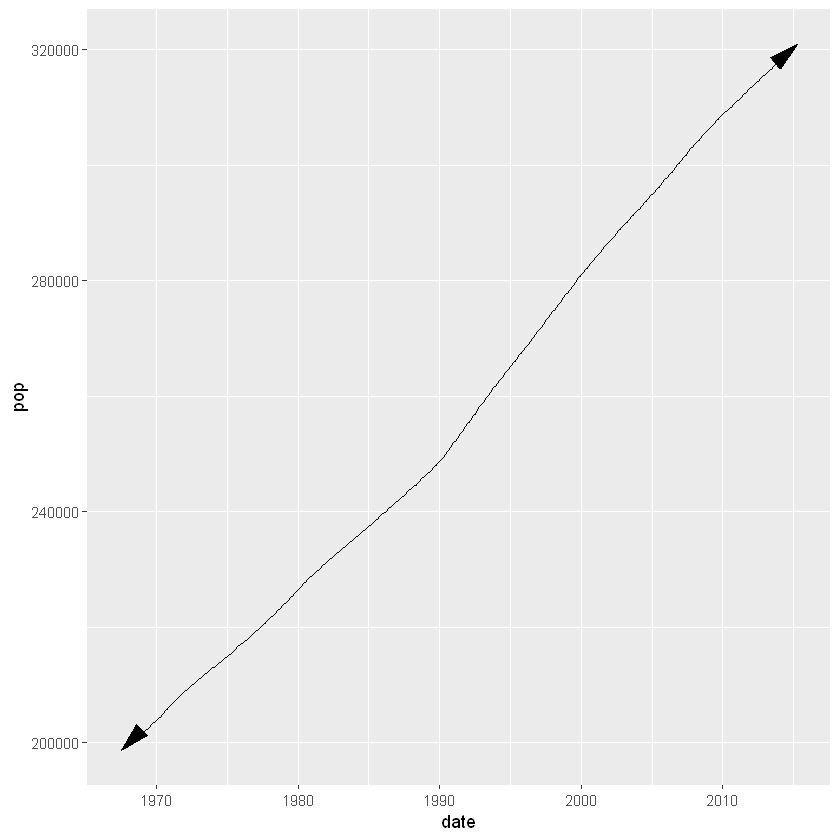

In [10]:
c + geom_line(
  arrow = arrow(angle = 15, ends = "both", type = "closed")
)

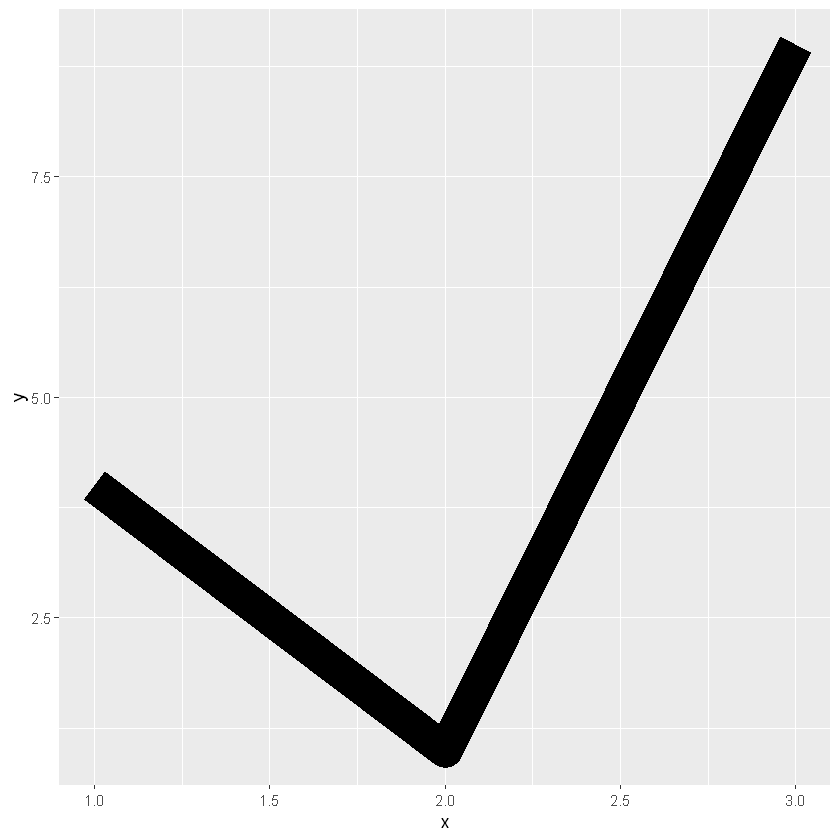

In [11]:
# Controlling line join parameters

df <- data.frame(x = 1:3, y = c(4, 1, 9))

base <- ggplot(df, aes(x, y))
base + geom_path(size = 10)

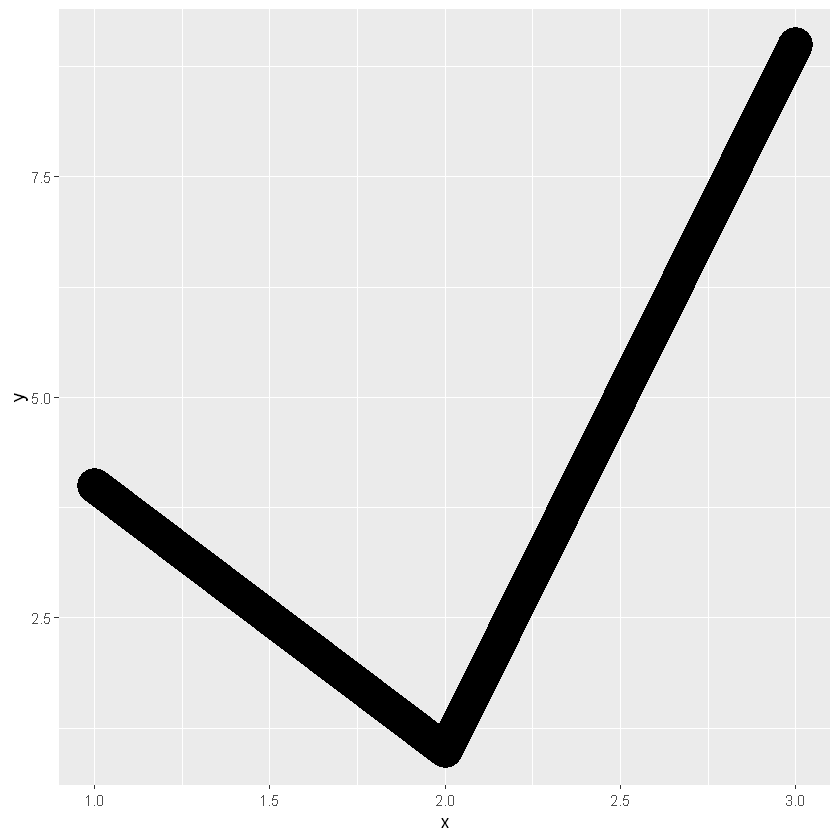

In [12]:
base + geom_path(size = 10, lineend = "round")

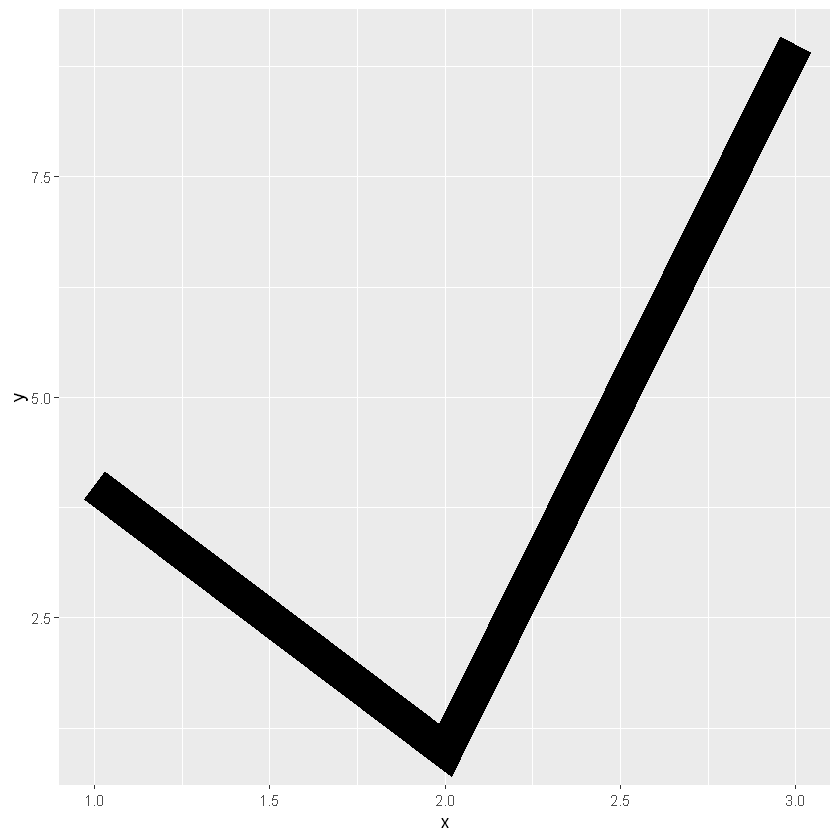

In [13]:
base + geom_path(size = 10, linejoin = "mitre", 
                 lineend = "butt")

Warning message:
"Removed 1 rows containing missing values (geom_point)."

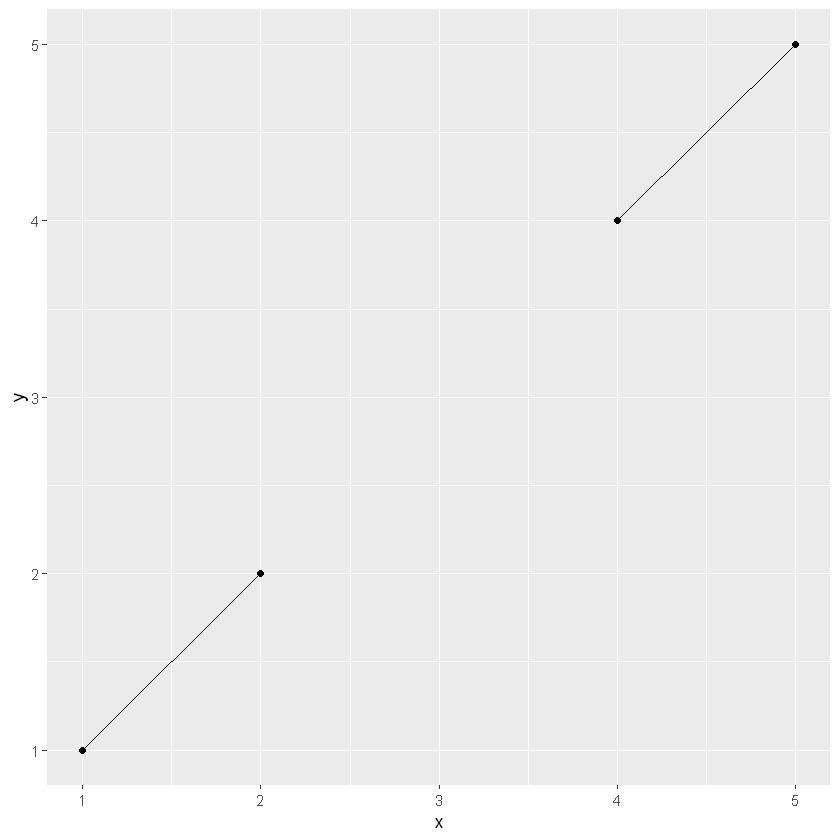

In [14]:
# Use NAs to break the line.

df <- data.frame(x = 1:5, y = c(1, 2, NA, 4, 5))

ggplot(df, aes(x, y)) +
  geom_point() +
  geom_line()

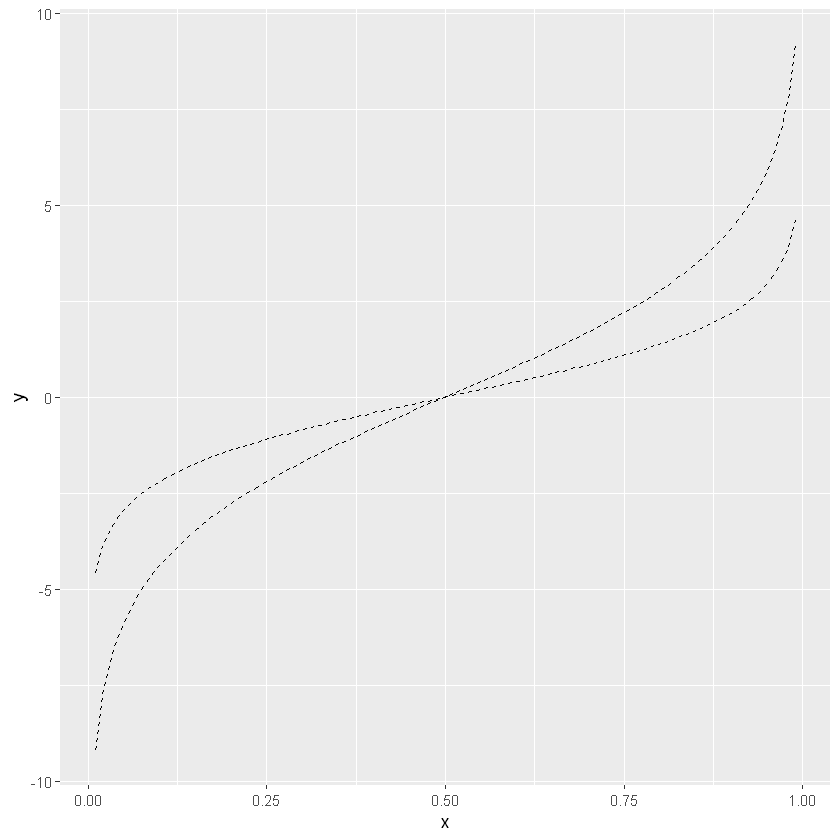

In [15]:
# Setting line type vs colour / size
# Line type needs to be applied to a line as a whole, so it 
# can not be used with colour or size that vary across a line

x <- seq(0.01, .99, length.out = 100)

df <- data.frame(
  x = rep(x, 2),
  y = c(qlogis(x), 2 * qlogis(x)),
  group = rep(c("a", "b"), each = 100)
)

p <- ggplot(df, aes(x = x, y = y, group = group))
# These work

p + geom_line(linetype = 2)

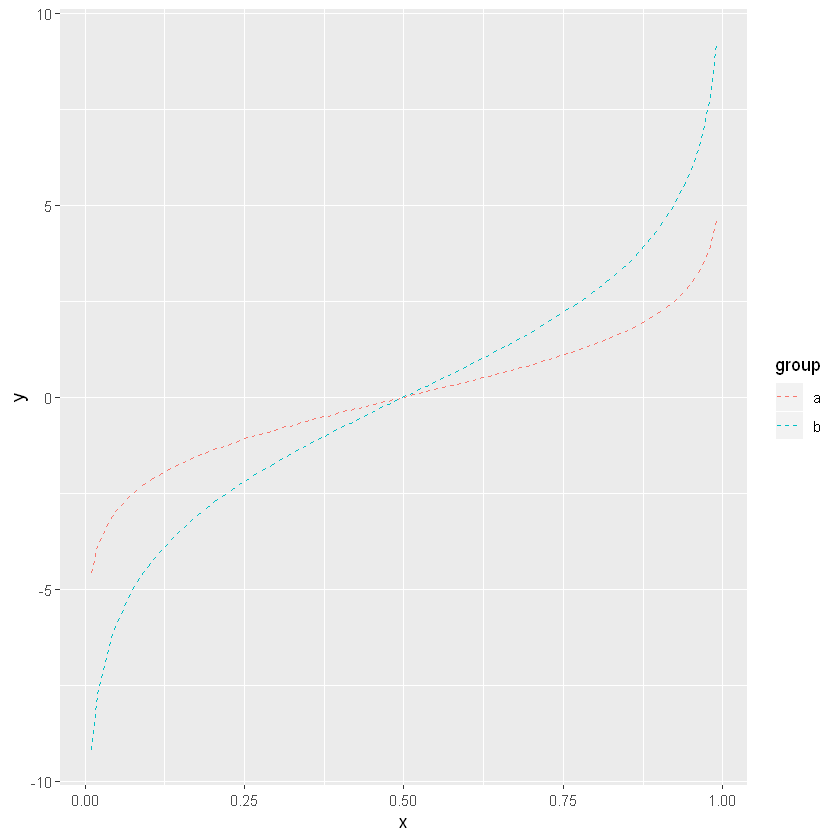

In [16]:
p + geom_line(aes(colour = group), linetype = 2)

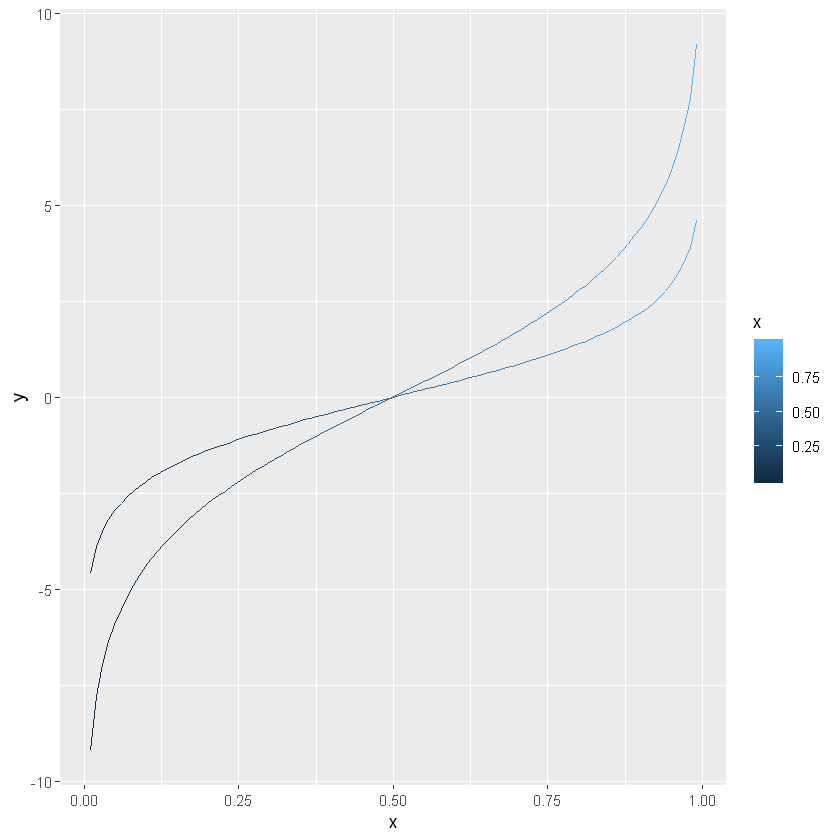

In [17]:
p + geom_line(aes(colour = x))

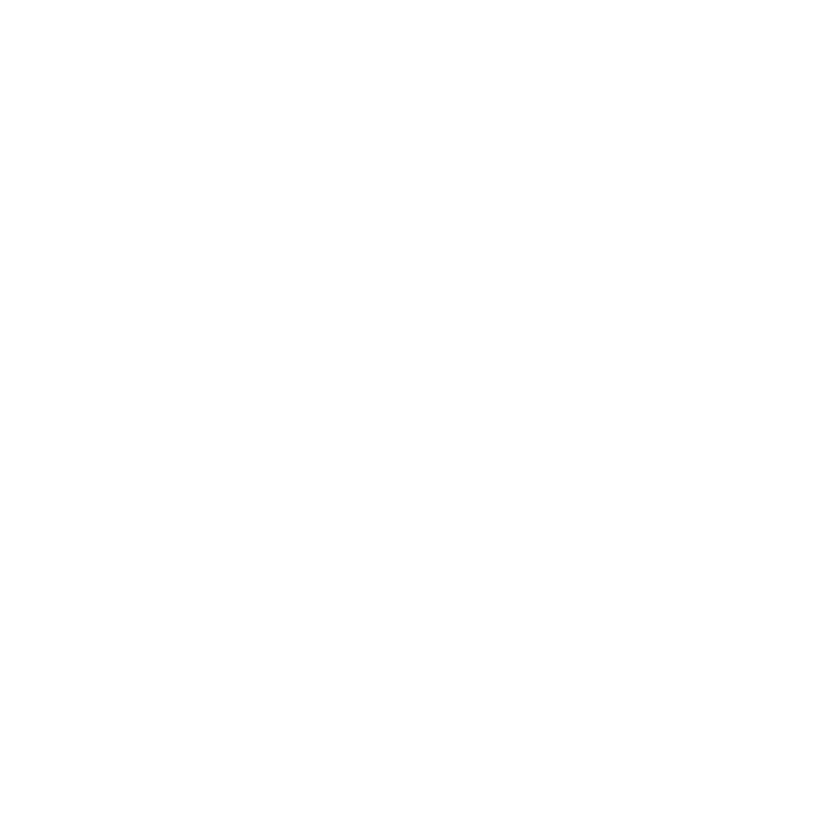

In [18]:
#.. But this doesn't
should_stop(p + geom_line(aes(colour = x), linetype = 2))